# Observations and Insights

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
# Study data files
RMS_path = "Downloads/RMS.csv"
# Read the data
RMS = pd.read_csv(RMS_path)
print(RMS.head())

  ARREST_DATE      DATE  YEAR    MONTH  WEEK SEX RACE ETHNIC  FBI      SID  \
0    1/1/2016  1/1/2016  2016  JANUARY     1   F    W      N  NaN      NaN   
1    1/1/2016  1/1/2016  2016  JANUARY     1   M    W      H  NaN      NaN   
2    1/1/2016  1/1/2016  2016  JANUARY     1   M    W      H  NaN   664565   
3    1/1/2016  1/1/2016  2016  JANUARY     1   M    W      H  NaN  1049997   
4    1/1/2016  1/1/2016  2016  JANUARY     1   F    W      H  NaN   964686   

   ... INVOLVEMENT  INCIDENT_NUM OFFENSE_CODE               OFFENSE-DESC  \
0  ...           A  SAPD16000022       420001  TABC-Liquor Law Violation   
1  ...           A  SAPD16000026       420001  TABC-Liquor Law Violation   
2  ...           A  SAPD16056633           56               Other Crimes   
3  ...           A  SAPD16000052       131352            Family Violence   
4  ...           A  SAPD16000030       131352            Family Violence   

                       RMS_DESCRIPTION GIS_ARCTYPE DISTRICT              C

In [35]:
RMS = RMS.loc[(RMS["OFFENSE-DESC"]!="Other Crimes")]
print(RMS)

       ARREST_DATE        DATE  YEAR     MONTH  WEEK SEX RACE ETHNIC  FBI  \
0         1/1/2016    1/1/2016  2016   JANUARY     1   F    W      N  NaN   
1         1/1/2016    1/1/2016  2016   JANUARY     1   M    W      H  NaN   
3         1/1/2016    1/1/2016  2016   JANUARY     1   M    W      H  NaN   
4         1/1/2016    1/1/2016  2016   JANUARY     1   F    W      H  NaN   
5         1/1/2016    1/1/2016  2016   JANUARY     1   M    W      H  NaN   
...            ...         ...   ...       ...   ...  ..  ...    ...  ...   
219216  12/31/2018  12/31/2018  2018  DECEMBER    53   M    W      H  NaN   
219217  12/31/2018  12/31/2018  2018  DECEMBER    53   F    W      H  NaN   
219218  12/31/2018  12/31/2018  2018  DECEMBER    53   M    B      N  NaN   
219219  12/31/2018  12/31/2018  2018  DECEMBER    53   M    B      N  NaN   
219222  12/31/2018  12/31/2018  2018  DECEMBER    53   M    W      H  NaN   

            SID  ... INVOLVEMENT  INCIDENT_NUM OFFENSE_CODE  \
0           

# Offender Age Demographics

In [36]:
clean_offender_df=RMS.loc[RMS['AGE']>0]
clean_offender_df = clean_offender_df.dropna(subset=['AGE'])

clean_offender_df = clean_offender_df.dropna(subset=['OFFENSE-DESC'])

total_crime = clean_offender_df["INCIDENT_NUM"].count()
crime_df = pd.DataFrame({"Total Crime":[total_crime]})

print(clean_offender_df)

       ARREST_DATE        DATE  YEAR     MONTH  WEEK SEX RACE ETHNIC  FBI  \
0         1/1/2016    1/1/2016  2016   JANUARY     1   F    W      N  NaN   
1         1/1/2016    1/1/2016  2016   JANUARY     1   M    W      H  NaN   
3         1/1/2016    1/1/2016  2016   JANUARY     1   M    W      H  NaN   
4         1/1/2016    1/1/2016  2016   JANUARY     1   F    W      H  NaN   
5         1/1/2016    1/1/2016  2016   JANUARY     1   M    W      H  NaN   
...            ...         ...   ...       ...   ...  ..  ...    ...  ...   
219216  12/31/2018  12/31/2018  2018  DECEMBER    53   M    W      H  NaN   
219217  12/31/2018  12/31/2018  2018  DECEMBER    53   F    W      H  NaN   
219218  12/31/2018  12/31/2018  2018  DECEMBER    53   M    B      N  NaN   
219219  12/31/2018  12/31/2018  2018  DECEMBER    53   M    B      N  NaN   
219222  12/31/2018  12/31/2018  2018  DECEMBER    53   M    W      H  NaN   

            SID  ... INVOLVEMENT  INCIDENT_NUM OFFENSE_CODE  \
0           

In [37]:
age_bins = [0, 19, 29, 39.90, 49.90, 59.90, 69.90, 99999]
group_names = ["17-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"]
clean_offender_df["Age Group"] = pd.cut(clean_offender_df["AGE"],age_bins, labels=group_names, right=True, include_lowest=False)
clean_offender_df
age_group = clean_offender_df.groupby("Age Group").count()["AGE"]
age_group
total = clean_offender_df["AGE"].count()

percent_age = (age_group/total)

age_demo = pd.DataFrame({"Total Count": age_group, "Percentage of Offenders": percent_age})
age_demo.index.name = None
age_demo = age_demo.style.format({"Percentage of Offenders":"{:.2%}"})

age_demo

,Total Count,Percentage of Offenders
17-19,9545,6.96%
20-29,47517,34.66%
30-39,38980,28.43%
40-49,20637,15.05%
50-59,15469,11.28%
60-69,4407,3.21%
70+,535,0.39%


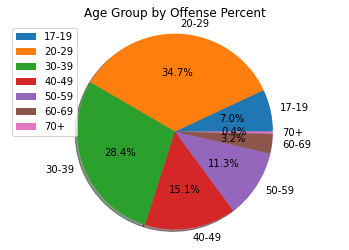

In [38]:
plt.pie(age_group.values,autopct="%1.1f%%", shadow=True, labels=age_group.index.values)
plt.legend()
plt.axis("equal")
plt.title("Age Group by Offense Percent")
plt.show()

In [51]:
#offenses = clean_offender_df[["AGE", "OFFENSE-DESC"]]
top_offenses = clean_offender_df.groupby(["Age Group"])["OFFENSE-DESC"].value_counts()
# offense_count = top_offenses.count()["INCIDENT_NUM"]

most_popular_offenses = pd.DataFrame(top_offenses)

teen_age = most_popular_offenses.loc["17-19",:]
top_teen = teen_age.idxmax()
print(top_teen)

twenty_age = most_popular_offenses.loc["20-29",:]
top_twenty = twenty_age.idxmax()
print(top_twenty)

thirty_age = most_popular_offenses.loc["30-39",:]
top_thirty = thirty_age.idxmax()
print(top_thirty)

forty_age = most_popular_offenses.loc["40-49",:]
top_forty = forty_age.idxmax()
print(top_forty)

fifty_age = most_popular_offenses.loc["50-59",:]
top_fifty = fifty_age.idxmax()
print(top_fifty)

sixty_age= most_popular_offenses.loc["60-69",:]
top_sixty = sixty_age.idxmax()
print(top_sixty)

seventy_age = most_popular_offenses.loc["70+",:]
top_seventy = seventy_age.idxmax()
print(top_seventy)

OFFENSE-DESC    Drug Arrest
dtype: object
OFFENSE-DESC    Drug Arrest
dtype: object
OFFENSE-DESC    Drug Arrest
dtype: object
OFFENSE-DESC    TABC-Liquor Law Violation
dtype: object
OFFENSE-DESC    TABC-Liquor Law Violation
dtype: object
OFFENSE-DESC    TABC-Liquor Law Violation
dtype: object
OFFENSE-DESC    TABC-Liquor Law Violation
dtype: object


In [32]:
df1 = [top_teen, top_twenty, top_thirty, top_forty, top_fifty, top_sixty, top_seventy]
all_age = pd.concat(df1, axis = 0)
print(all_age)

OFFENSE-DESC                  Drug Arrest
OFFENSE-DESC                  Drug Arrest
OFFENSE-DESC                  Drug Arrest
OFFENSE-DESC    TABC-Liquor Law Violation
OFFENSE-DESC    TABC-Liquor Law Violation
OFFENSE-DESC    TABC-Liquor Law Violation
OFFENSE-DESC    TABC-Liquor Law Violation
dtype: object


In [ ]:
# gender_stats = clean_offender_df.groupby('SEX')
# total_count_gender = gender_stats.nunique()['INCIDENT_NUM']

# percentage_of_offender = total_count_gender / total_crime

# gender_demo = pd.DataFrame({"Total Count": total_count_gender, "Percentage of Offender": percentage_of_offender})

# gender_demo.index.name = None

# gender_demo = gender_demo.sort_values(["Total Count"], ascending = False).style.format({"Percentage of Offender":"{:.2%}"})
# gender_demo